## Xg_boost Classifiaction Implementation

In [2]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Data cleaning

In [4]:
## HAndling missing Value
## Checking all the columns
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [5]:
## Checking all the categories
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [6]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [7]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [8]:
df['Gender']=df['Gender'].replace('Fe Male','Female')
df['MaritalStatus']=df['MaritalStatus'].replace('Single','Unmarried')

In [9]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [10]:
feature_with_na = [feature for feature in df.columns if df[feature].isnull().sum() >= 1]

# Displaying missing value percentages
for feature in feature_with_na:
    print(f"{feature}: {np.round(df[feature].isnull().mean() * 100, 5)}% missing values")

Age: 4.62357% missing values
TypeofContact: 0.51146% missing values
DurationOfPitch: 5.13502% missing values
NumberOfFollowups: 0.92062% missing values
PreferredPropertyStar: 0.53191% missing values
NumberOfTrips: 2.86416% missing values
NumberOfChildrenVisiting: 1.35025% missing values
MonthlyIncome: 4.76678% missing values


In [11]:
## Statistic on numerical cloumns (Null cols)
df[feature_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


## Imputing Null Values
1. Impute Median value of Age column
2. Impute Mode for Type of Contract
3. Impute Median for Duration of pitch
4. Impute Mode for the NumberFollowup as it is Discrete feature
5. Impute Mode for PreferredPropertyStar
6. Impute median for NumberofTips
7. Impute Mode for NumberOfChlidrenVisiting
8. Impute Median for MontlyIncome 

In [12]:
df.Age.fillna(df.Age.median(),inplace=True)
## Type of Contract
df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)
## Duration Of pitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)
##Number of FOllowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode().mode()[0],inplace=True)
##PrefereedPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)
## NUmber of tips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)
## Number of Chlidren Visting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)
## Montly Income
df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [13]:
df.head()


,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [14]:
df.drop('CustomerID',inplace=True,axis=1)

## Feature Engineering

### Feature Extraction

In [15]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [16]:
## Create a new column for feature
df['TotalVisting']=df['NumberOfChildrenVisiting']+df['NumberOfPersonVisiting']
df.drop(columns=['NumberOfChildrenVisiting','NumberOfPersonVisiting'],axis=1,inplace=True)

In [17]:
## Get All the Numeric Feature
num_feature=[feature for feature in df.columns if df[feature].dtype!='O']
print('Num Of numerical Feature:',len(num_feature))

Num Of numerical Feature: 12


In [18]:
## Categorical Feature
cat_feature=[feature for feature in df.columns if df[feature].dtype=='O']
print('Num Of categorical Feature:',len(cat_feature))

Num Of categorical Feature: 6


In [19]:
## Discrete Feature
dis_feature=[feature for feature in df.columns if len(df[feature].unique())<=25]
print('Num Of discrete Feature:',len(dis_feature))

Num Of discrete Feature: 15


In [20]:
## Continous Feature
con_feature=[feature for feature in num_feature if feature not in dis_feature]
print('Num Of continous Feature:',len(con_feature))

Num Of continous Feature: 3


## Train Test Spilt And Model Training

In [21]:
from sklearn.model_selection import train_test_split
X=df.drop(['ProdTaken'],axis=1)
y=df['ProdTaken']

In [22]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [23]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [24]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisting
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((3910, 17), (978, 17))

In [26]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

cat_feature = X.select_dtypes(include="object").columns
num_feature = X.select_dtypes(exclude="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_feature),
        ("StandardScaler", numeric_transformer, num_feature)  # ✅ Correct tuple
    ]
)


In [27]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisting'],
      dtype='object'))])

In [28]:
X_train=preprocessor.fit_transform(X_train)

In [29]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.157926,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.508072,-0.721400,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.396069,-0.721400,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.064073,-0.721400,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.730071,-0.721400,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.045924,-0.721400,-0.653841,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.397072,1.455047,-0.898180,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.064073,1.455047,1.545210,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-1.045924,1.455047,1.789549,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,-0.252799,0.643615


In [30]:
X_test=preprocessor.transform(X_test)

In [31]:
!pip install xgboost


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,confusion_matrix,roc_auc_score,roc_curve

In [38]:
models={
    "Logistic Regression":LogisticRegression(),
    "RandomForest":RandomForestClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "GradientBoost":GradientBoostingClassifier(),
    "AdaBoostClassifier":AdaBoostClassifier(),
    "Xgboost":XGBClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    ## Make Prediction
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)
    
    ## Training Set Performance
    model_train_accuracy=accuracy_score(y_train,y_train_pred)
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_roauc_score=roc_auc_score(y_train,y_train_pred)
    
    ## Test set performance
    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_roauc_score=roc_auc_score(y_test,y_test_pred)
    print(list(models.keys())[i])
    
    print('Model performance on Training Set')
    print('-Acuuracy:{:.4f}'.format(model_train_accuracy))
    print('-F1 score:{:.4f}'.format(model_train_f1))
    
    print('-Precision:{:.4f}'.format(model_train_precision))
    print('-Recall:{:.4f}'.format(model_train_recall))
    print('- ROC Auc Score:{:.4f}'.format(model_train_roauc_score))
    
    print('-------------------------------------------------------')
    print('model Performance on test set')
    print('-Acuuracy:{:.4f}'.format(model_test_accuracy))
    print('-F1 score:{:.4f}'.format(model_test_f1))
    
    print('-Precision:{:.4f}'.format(model_test_precision))
    print('-Recall:{:.4f}'.format(model_test_recall))
    print('- ROC Auc Score:{:.4f}'.format(model_test_roauc_score))
    print('-------------------------------------------------------')
    print('-------------------------------------------------------')

Logistic Regression
Model performance on Training Set
-Acuuracy:0.8460
-F1 score:0.8202
-Precision:0.7016
-Recall:0.3032
- ROC Auc Score:0.6368
-------------------------------------------------------
model Performance on test set
-Acuuracy:0.8364
-F1 score:0.8087
-Precision:0.6914
-Recall:0.2932
- ROC Auc Score:0.6307
-------------------------------------------------------
-------------------------------------------------------
RandomForest
Model performance on Training Set
-Acuuracy:1.0000
-F1 score:1.0000
-Precision:1.0000
-Recall:1.0000
- ROC Auc Score:1.0000
-------------------------------------------------------
model Performance on test set
-Acuuracy:0.9284
-F1 score:0.9226
-Precision:0.9764
-Recall:0.6492
- ROC Auc Score:0.8227
-------------------------------------------------------
-------------------------------------------------------
Decision Tree
Model performance on Training Set
-Acuuracy:1.0000
-F1 score:1.0000
-Precision:1.0000
-Recall:1.0000
- ROC Auc Score:1.0000
-----

In [39]:
## Hyperparameter Tunning
rf_params={'max_depth':[5,8,15,None,10],
           'max_features':[5,7,"auto",8],
           'min_samples_split':[2,8,15,20],
           'n_estimators':[100,200,500,1000]}


xgboost_params={"learning_rate":[0.1,0.01],
                "max_depth":[5,8,12,20,30],
                "n_estimators":[100,200,300],
                "colsample_bytree":[0.5,0.8,1,0.3,0.4]
                }

In [40]:
xgboost_params

{'learning_rate': [0.1, 0.01],
 'max_depth': [5, 8, 12, 20, 30],
 'n_estimators': [100, 200, 300],
 'colsample_bytree': [0.5, 0.8, 1, 0.3, 0.4]}

In [41]:
## Model list for Hyperparameter Tuning
radomcv_model=[
    ("Rf",RandomForestClassifier(),rf_params),
    ("XG",XGBClassifier(),xgboost_params)
]

In [42]:
radomcv_model

[('Rf',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('XG',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  {'learning_ra

In [43]:
from sklearn.model_selection import RandomizedSearchCV

model_param={}
for name,model,params in radomcv_model:
    random=RandomizedSearchCV(estimator=model,
                              param_distributions=params,
                              n_iter=100,
                              cv=3,
                              verbose=2,
                              n_jobs=-1)
    random.fit(X_train,y_train)
    model_param[name]=random.best_params_
    
for model_name in model_param:
    print(f"---------------- Best Params for {model_name}--------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for Rf--------
{'n_estimators': 1000, 'min_samples_split': 2, 'max_features': 7, 'max_depth': None}
---------------- Best Params for XG--------
{'n_estimators': 300, 'max_depth': 20, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [44]:
models={
    "RandomForest":RandomForestClassifier(n_estimators=100,min_samples_split=2,max_features=8,max_depth=15),
    "XGbooxt":XGBClassifier(n_estimators=300,max_depth=20,learning_rate=0.1,colsample_bytree=0.8)
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    
    ## Make Prediction
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
    
    ## Training Set Performance
model_train_accuracy=accuracy_score(y_train,y_train_pred)
model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
model_train_precision=precision_score(y_train,y_train_pred)
model_train_recall=recall_score(y_train,y_train_pred)
model_train_roauc_score=roc_auc_score(y_train,y_train_pred)
    
    ## Test set performance
model_test_accuracy=accuracy_score(y_test,y_test_pred)
model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
model_test_precision=precision_score(y_test,y_test_pred)
model_test_recall=recall_score(y_test,y_test_pred)
model_test_roauc_score=roc_auc_score(y_test,y_test_pred)
print(list(models.keys())[i])
    
print('Model performance on Training Set')
print('-Acuuracy:{:.4f}'.format(model_train_accuracy))
print('-F1 score:{:.4f}'.format(model_train_f1))
    
print('-Precision:{:.4f}'.format(model_train_precision))
print('-Recall:{:.4f}'.format(model_train_recall))
print('- ROC Auc Score:{:.4f}'.format(model_train_roauc_score))
    
print('-------------------------------------------------------')
print('model Performance on test set')
print('-Acuuracy:{:.4f}'.format(model_test_accuracy))
print('-F1 score:{:.4f}'.format(model_test_f1))
    
print('-Precision:{:.4f}'.format(model_test_precision))
print('-Recall:{:.4f}'.format(model_test_recall))
print('- ROC Auc Score:{:.4f}'.format(model_test_roauc_score))
print('-------------------------------------------------------')
print('-------------------------------------------------------')


XGbooxt
Model performance on Training Set
-Acuuracy:1.0000
-F1 score:1.0000
-Precision:1.0000
-Recall:1.0000
- ROC Auc Score:1.0000
-------------------------------------------------------
model Performance on test set
-Acuuracy:0.9540
-F1 score:0.9520
-Precision:0.9740
-Recall:0.7853
- ROC Auc Score:0.8901
-------------------------------------------------------
-------------------------------------------------------


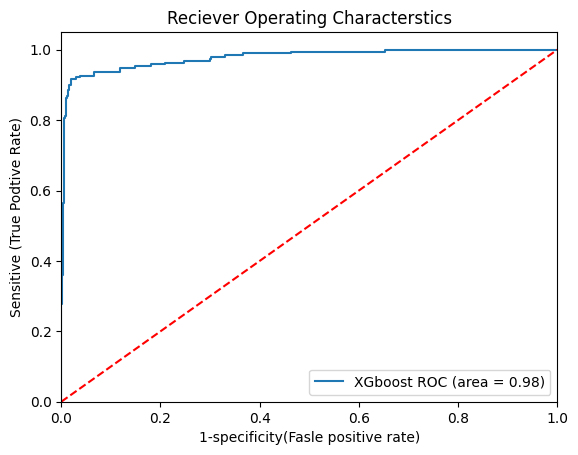

In [45]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()
## Add the models to the list that youn want to view on the ROC plot
auc_model=[
    {
        'label':'XGboost',
        'model':XGBClassifier(n_estimators=300,max_depth=20,learning_rate=0.1,colsample_bytree=0.8),
        'auc':0.8901
    }
]
## Create a loop through all the model
for algo in auc_model:
    model=algo['model']
    model.fit(X_train,y_train)
## Compute False positive and True positive Rate
    fpr,tpr,threshold=roc_curve(y_test,model.predict_proba(X_test)[:,1])
    ## Calculate the area under the curve
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # Compute AUC score
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], auc))  # ✅ Pass AUC

## Customize Setting
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('1-specificity(Fasle positive rate)')
plt.ylabel('Sensitive (True Podtive Rate)')
plt.title('Reciever Operating Characterstics')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()